# Distributions

Let's start our journey with learning the distributions which is the fundamental of statictics.

In [24]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# Discrete probability distributions

## Bernoulli destribution

The simplest type of random experiment has only two outcomes, and we can denote them by 0 and 1. A random variable X has the Bernoulli distribution with parameter p (0≤p≤1) if X can take only the values 0 and 1 and the probability of each value is

$P(X=1)=p$

$P(X=0)=1-p$ 

$P(X=x) = p^x \cdot (1-p)^{1-x}, \hspace{0.5cm} x=\{0,1\}$

In [35]:
from scipy.stats import bernoulli

#For P(X=1)=0.5
x=1
p = 0.5
print(bernoulli.pmf(k=x, p=p))
print(bernoulli.cdf(k=x, p=p))
print(bernoulli.mean(p=p), bernoulli.std(p=p))

bernoulli.rvs(p=p, size=5, random_state=None) #creates sample size 5 of independent results
#random_state makes it random, you can specify it to get the same results all the time

0.5
1.0
0.5 0.5


array([0, 1, 0, 0, 0], dtype=int64)

Creating the PMF for different probabilities:

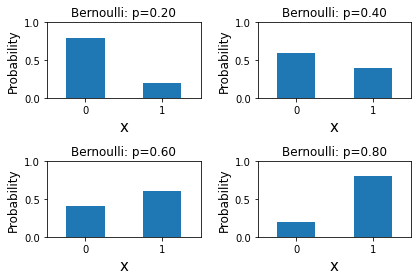

In [42]:
X=[0,1]
p=[0.2,0.4,0.6,0.8]

for index, prob in enumerate(p):
    plt.subplot(2,2,index+1)
    plt.bar(X, bernoulli.pmf(k=X, p=prob), width = 0.5)
    plt.xlim(-0.5, 1.5)
    plt.ylim(0, 1)
    plt.title('Bernoulli: p=%.2f' % (prob), fontsize=12)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(np.arange(0, 2, 1))

plt.tight_layout()
plt.show()

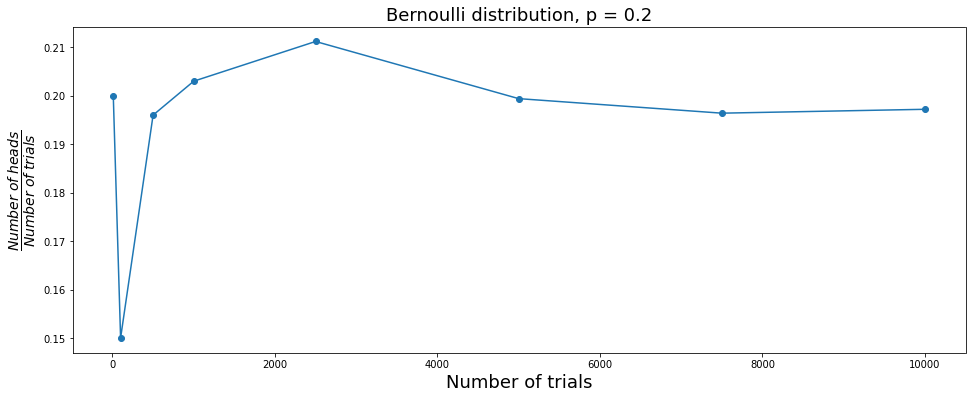

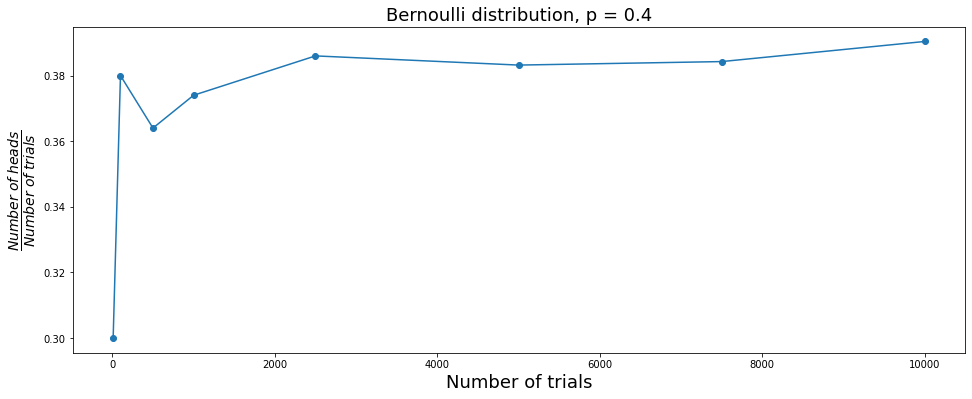

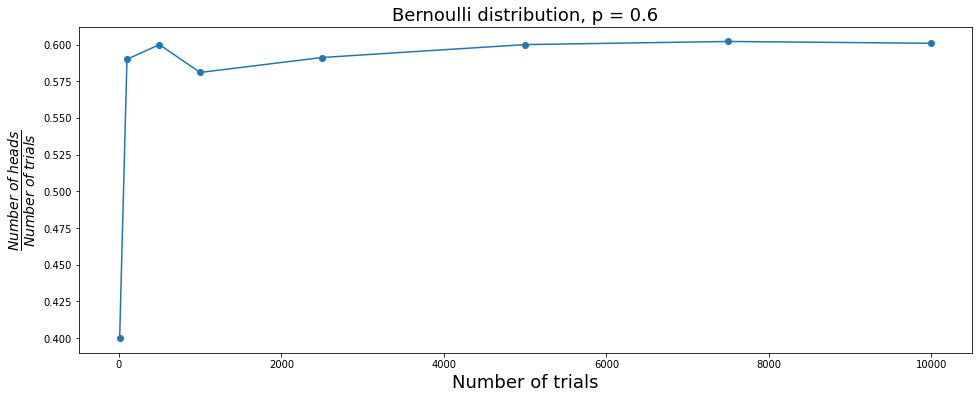

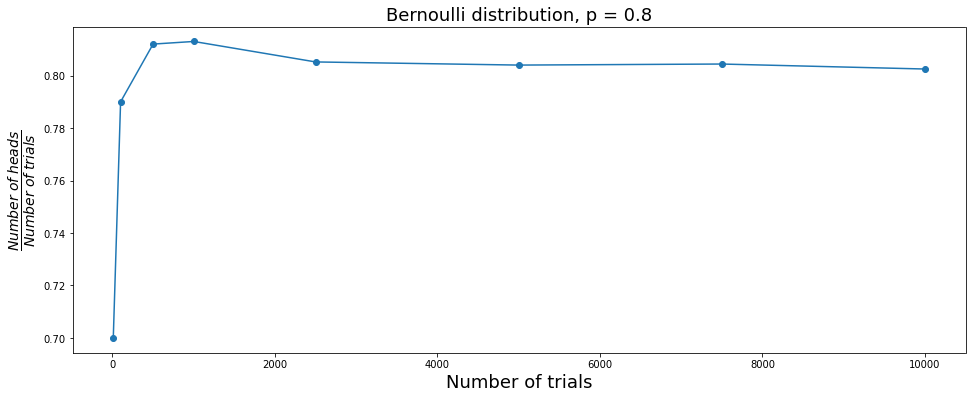

In [55]:
np.random.seed(0)
p=[0.2,0.4,0.6,0.8]
for prob in p:
    sample = bernoulli.rvs(p=prob, size = 10000)
    num_trials = [10, 100, 500, 1000, 2500, 5000, 7500, 10000]
    points = [sample[0:l].mean() for l in num_trials] # we cut the sample in specific points and count the mean

    plt.figure(figsize=(16,6))
    plt.plot(num_trials, points, marker="o")
    plt.xlabel("Number of trials", fontsize = 18)
    plt.ylabel(r"$\frac{Number\; of \; heads}{Number\; of \; trials}$",
            fontsize= 20)
    plt.title("Bernoulli distribution, p = {}".format(prob), fontsize= 18)
    plt.show()

Whatever the probability we choose the ratio of heads to all trials comes to it as for Bernoulli distribution this is the expected value

## Binomial distribution

Suppose that we have n independent random variables X₁, X₂, ..., Xₙ, and each of them has a Bernoulli distribution with parameter p. If X = X₁+X₂+ ... Xₙ, then X (which is also a discrete random variable) has the binomial distribution with parameters n and p. We can also write it as X ~ Bin(n, p).

$P(X=x) = \binom{n}{x} \cdot p^x \cdot (1-p)^{n-x}$

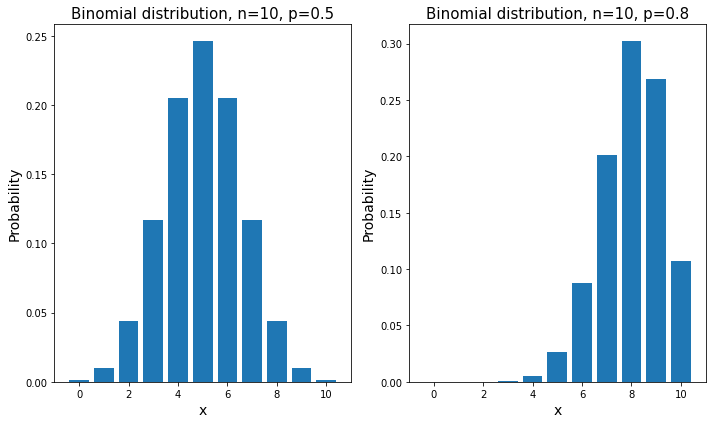

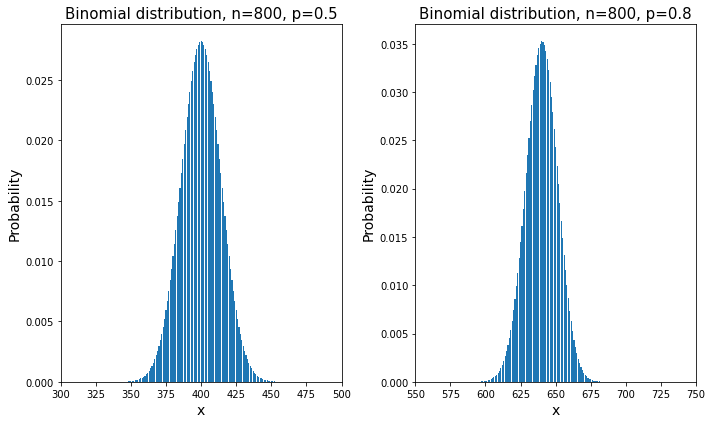

In [76]:
from scipy.stats import binom
n = 10
p = 0.5
x = np.arange(0, n+1)
binomial = binom.pmf(k=x, n=n, p=p)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(x, binomial)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xlim([-1, 11])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p),
          fontsize= 15)

p = 0.8
x = np.arange(0, n+1)
binomial = binom.pmf(k=x, n=n, p=p)
plt.subplot(1,2,2)
plt.bar(x, binomial)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xlim([-1, 11])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p),
          fontsize= 15)
plt.tight_layout()
plt.show()


#big samples

p = 0.5
n = 800
x = np.arange(0, n+1)
binomial = binom.pmf(k=x, n=n, p=p)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(x, binomial)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xlim([300, 500])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p),
          fontsize= 15)

p = 0.8
n = 800
x = np.arange(0, n+1)
binomial = binom.pmf(k=x, n=n, p=p)
plt.subplot(1,2,2)
plt.bar(x, binomial)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xlim([550, 750])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p),
          fontsize= 15)
plt.tight_layout()
plt.show()

However, as $n$ goes to infinity, the shape of the binomial distribution becomes more symmetric (the reason for that is the central limit theorem).

Now we get 3 random samples from a Binomial distribution with n = 8 and p = 0.5 and plot their bar chart. Here we use the rvs() method to get a random sample of size n from a Bernoulli distribution and then calculate its sum. We repeat this sampling procedure s times to have a sample of size s from the binomial distribution:

[2 3 4 5 6] Distinct values for n = 8 drawn in sample of size = 10
[2 3 1 1 3] Count of each of the values for n = 8 in sample of size = 10
[0.2 0.3 0.1 0.1 0.3] The probabilty of each value for n = 8 calculated from the occurence in the sample
----------------------------------------------------------------
[1 2 3 4 5 6 7] Distinct values for n = 8 drawn in sample of size = 100
[ 4 16 17 33 18  9  3] Count of each of the values for n = 8 in sample of size = 100
[0.04 0.16 0.17 0.33 0.18 0.09 0.03] The probabilty of each value for n = 8 calculated from the occurence in the sample
----------------------------------------------------------------
[0 1 2 3 4 5 6 7 8] Distinct values for n = 8 drawn in sample of size = 10000
[  40  298 1154 2185 2708 2172 1087  331   25] Count of each of the values for n = 8 in sample of size = 10000
[0.004  0.0298 0.1154 0.2185 0.2708 0.2172 0.1087 0.0331 0.0025] The probabilty of each value for n = 8 calculated from the occurence in the sample
-----------

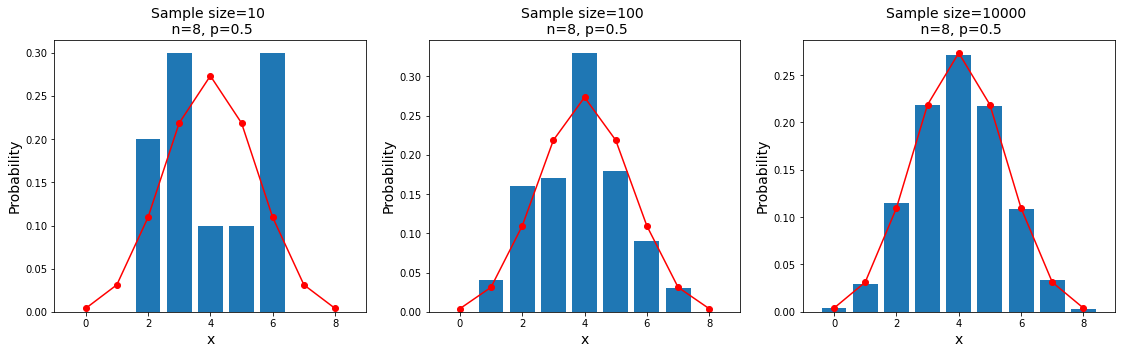

In [92]:
np.random.seed(0)
n = 8
p = 0.5
x = np.arange(9)
binomial = binom.pmf(k = x,n = n, p = p)
fig, axs = plt.subplots(1, 3, figsize=(19, 5))

for id, s in enumerate([10, 100, 10000]):
    sample = [bernoulli.rvs(p=p, size=n).sum() for i in range(s)]
    # sample = binom.rvs(n=n, p=p, size=s)
    values, counts = np.unique(sample, return_counts=True)
    print(values, "Distinct values for n = {0} drawn in sample of size = {1}".format(n,s))
    print(counts, "Count of each of the values for n = {0} in sample of size = {1}".format(n,s))
    probs = counts / counts.sum()
    print(probs, "The probabilty of each value for n = {0} calculated from the occurence in the sample".format(n))
    print("----------------------------------------------------------------")
    axs[id].bar(values, probs)
    axs[id].plot(x, binomial, marker='o', color='red')
    axs[id].set_title("Sample size={0} \n n={1}, p={2}".format(s, n, p),
                     fontsize=14)
    axs[id].set_xlabel('x', fontsize = 14)
    axs[id].set_ylabel('Probability', fontsize=14)
    axs[id].set_xlim([-1, 9])    
plt.show()

So the red line is the theoretical line, the PMF of Bernoulli Distribution and the blue bars represent the "estimated" probability. When the sample size is 10, the shape of the bar chart is irregular, but as we increase the sample size, the shape of the resulting bar chart approaches the PMF of the binomial distribution.

## Negative Binomial Distribution

Suppose that we have a sequence of Bernoulli trials with the parameter p (so the probability of success in each trial is p), and these trials are independent. Let the discrete random variable X denote the number of failures that occur before the rth success.

$P(X=x) = \binom{x+r-1}{x} \cdot p^r \cdot (1-p)^x$

So pₓ(x) gives the probability of getting x failures that occur before the rth success. We say that X has a negative binomial distribution with parameters r and p, and denote it by X ~ NBin(r, p).

We can create a negative binomial distribution using the object nbinom in scipy. The methods of this object take the parameters k, n and p which correspond to x, r, and p.

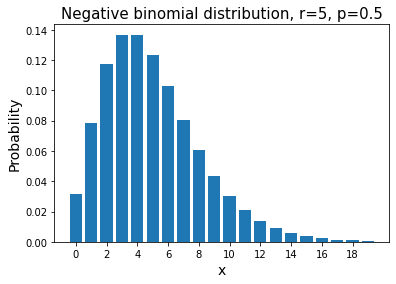

In [94]:
from scipy.stats import nbinom

r = 5
p = 0.5
x = np.arange(0, 20)
nbinomial = nbinom.pmf(k=x,n=r, p=p)
plt.bar(x, nbinomial)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title("Negative binomial distribution, r={0}, p={1}".format(r, p),
          fontsize= 15)
plt.xticks(np.arange(0, 20, 2))
plt.show()

Let us talk a little about the intuition behind this plot. Here r=5, and the last trial is a success, so we have 4 successes in the first n-1 trials, and x is the number of failures in the first n-1 trials. In a sequence of Bernoulli trials with p=0.5, we expect the number of failures to be roughly the same as the number of successes, so the mode of distribution is at x=3 and 4. And as x increases, the probability of x decreases quickly. In addition, as x decreases below 3, the probability decreases too.

Now we show how a negative binomial distribution results from a sequence of Bernoulli random variables. We assume that r=5. We create a 2-d array of Bernoulli random variates with the shape (sample_size, num_trials). Each row in this array represents a sequence of Bernoulli trials. The number of these sequences is determined by sample_size and the number of trials in each sequence is set by num_trials. We calculate the fraction of sequences in which the last trial is a success and the total number of successes is r. This fraction gives the probability of getting num_trials-r failures. We plot these probabilities for different values of sample_size. As sample_size increases, the shape of the bar chart gets closer to the PMF of a negative binomial distribution (red curve).

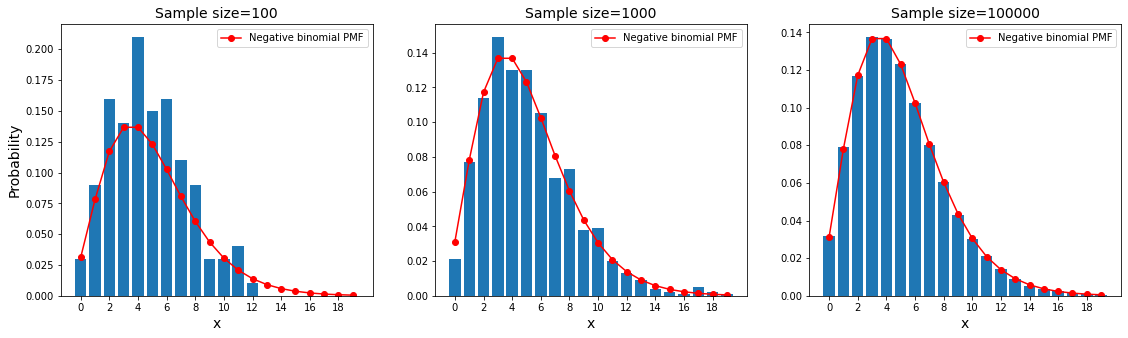

In [98]:
np.random.seed(0)
r = 5
p= 0.5
sample_size = [100, 1000, 100000]
x_range = range(20)
nbinomial = nbinom.pmf(k=x_range,n=r, p=p)
fig, axs = plt.subplots(1, 3, figsize=(19, 5))
for i in range(3):
    probs = []
    for x in x_range:
        num_trials = r + x
        sample = bernoulli.rvs(p=p, size=num_trials*sample_size[i]).reshape(sample_size[i], num_trials)
        filtered_sample = sample[(sample[:,-1] == 1) & (sample.sum(axis = 1) == r)]
        prob = len(filtered_sample) / sample_size[i]
        probs.append(prob)
    axs[i].bar(x_range, probs)
    axs[i].set_xticks(np.arange(0, 20, 2))
    axs[i].set_title("Sample size="+str(sample_size[i]), fontsize=14)
    axs[i].set_xlabel("x", fontsize=14)
    axs[i].plot(x_range, nbinomial, marker="o", color="red", label="Negative binomial PMF")
    axs[i].legend(loc="best")
axs[0].set_ylabel("Probability", fontsize=14)
plt.show()

## Geometric distribution

The geometric distribution is a special case of a negative binomial distribution where r=1. We denote this by X ~ Geom(p). Here fₓ(x) gives the probability of an event where success occurs at xth trial, so it means that we had x-1 failures before that.

$P(X=x) = (1-p)^{x-1} \cdot p $

In scipy we can generate a geometric distribution using the object geom. This object defines a geometric distribution where X represents the number of trials to get the first success. The methods of this object take the parameters k and p which correspond to x and p. So if x is the number of failures, geom.pmf(k=x,p=p) gives the PMF of x-1. Here we plot the PMF of a geometric distribution with p=0.5 and p=0.1. Please note that to get the number of failures, we plot geom.pmf(k=x,p=p) vs x-1.

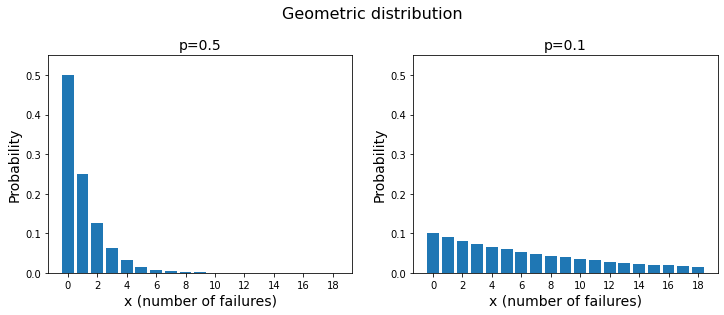

In [100]:
from scipy.stats import geom
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
p_list = [0.5, 0.1]
x = np.arange(1, 20)
for i, p in enumerate(p_list):
    geometric = geom.pmf(k=x,p=p)
    axs[i].bar(x-1, geometric)
    axs[i].set_xlabel("x (number of failures)", fontsize=14)
    axs[i].set_ylabel("Probability", fontsize=14)
    axs[i].set_title("p={0}".format(p),
    fontsize= 14)
    axs[i].set_ylim([0, 0.55])
    axs[i].set_xticks(np.arange(0, 20, 2))
plt.suptitle("Geometric distribution", fontsize=16, y=1.05)
plt.show()

In this plot, the probability of getting 0 failures before the first success is p. That is because the first Bernoulli trial is a success, and we know that it happens with a probability of p. As x increases, the probability drops since there is little chance that we have many successive failures. For a lower value of p, the chance of failure increases, so the probability of getting higher values of x increases.

The geometric distribution is memoryless. It means that if the first success has not yet occurred in the first $m$ trials (so $X \geq m$), then the probability that it does not occur in the next $n$ trials ($X \geq n + m$), is the same as that of its not occurring in the first $n$ trials ($X \geq n$). Mathematically:

$P(X \geq n + m | X \geq m) = P(X \geq n)$

**The geometric distribution is the only discrete distribution that is memoryless**. Hence, If X is a discrete random variable with the memoryless property, then X has a geometric distribution.

The memoryless property in a geometric distribution is the result of having a sequence of independent Bernoulli trials with the same parameter. Hence in each trial, the probability of success is the same and is not affected by the result of the previous trials. As an example, suppose that you are tossing a fair coin many times till you get one head. The probability of getting a head in a particular toss is independent of how many tails you had before that. If your first 3 tosses were all tails, you might intuitively expect that getting a head is more likely the next time. However, based on the memoryless property, the probability of getting a head in the next toss is still 0.5. That is because each toss is a Bernoulli trial with a probability of p=0.5 and the trials are independent of each other. So, the outcome of the previous tosses does not affect the outcome of the next toss.